In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

# The data (created)

In [3]:
x = np.linspace(0,50,501)

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
y = np.sin(x)

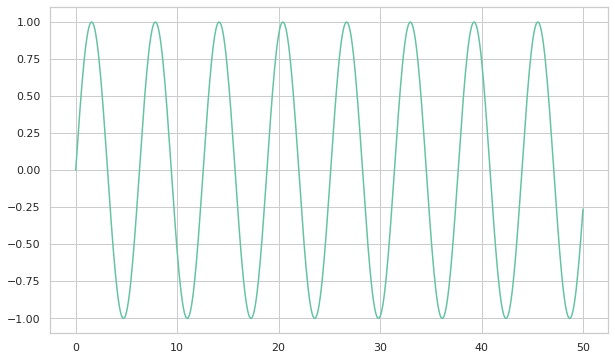

In [7]:
plt.plot(x,y);

In [8]:
df = pd.DataFrame(data = y, index = x, columns=['sine'])

In [9]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [10]:
test_percent = 0.1 # Leaving out final 10% of data for prediction

In [11]:
len(df)*test_percent

50.1

In [13]:
test_point = np.round(len(df)*test_percent) # Point beyond which the data will be cut off

In [14]:
test_point

50.0

In [15]:
test_ind = int(len(df) - test_point)

In [16]:
test_ind # Last index of training data

451

In [17]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [19]:
train.tail(2)

,sine
44.9,0.794208
45.0,0.850904


In [20]:
test.head(2)

,sine
45.1,0.899097
45.2,0.938307


## Scale Data

On RNN's, we need to scale the 'label' as it is fed into the neurons as input recurrently.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
# define generator
length = 4 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)

In [34]:
len(scaled_train)

451

In [35]:
# This should be len(scaled_train) - length (taking out this amount for forecasting)
len(generator)

447

In [36]:
# What does the first batch look like?
X,y = generator[0]

In [37]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]]])

In [38]:
y

array([[0.69470985]])

In [32]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [39]:
# What the batches are saying is:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041]
Predict this y: 
 [[0.69470985]]


Now you will be able to edit the length so that it makes sense for your time series!

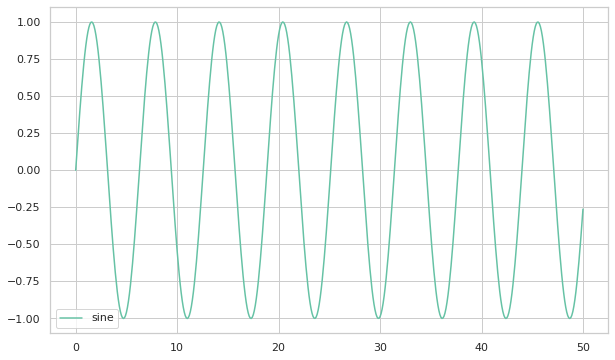

In [40]:
df.plot();

What to choose as `length`? Try to capture one full cycle.

Given this sine wave we can pick up one period (which is 2$\pi$).

As points are spaced by 0.1, inside this period there are around 62 points.

<AxesSubplot:>

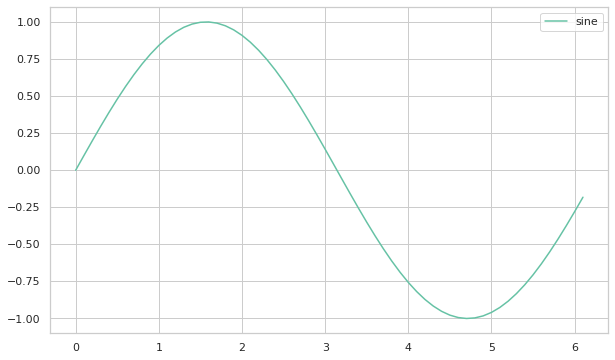

In [45]:
df.iloc[:62].plot()

In [88]:
# define generator
length = 50 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)

### Create the Model


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [90]:
# We're only using one feature in our time series
n_features = 1

In [91]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(60,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 60)                3720      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 2/5
401/401 [==============================] - 1s 4ms/step - loss: 1.6998e-05
Epoch 3/5
401/401 [==============================] - 1s 3ms/step - loss: 2.6376e-04
Epoch 4/5
401/401 [==============================] - 1s 3ms/step - loss: 3.5615e-05
Epoch 5/5
401/401 [==============================] - 1s 3ms/step - loss: 8.5946e-06


In [94]:
losses = pd.DataFrame(model.history.history)

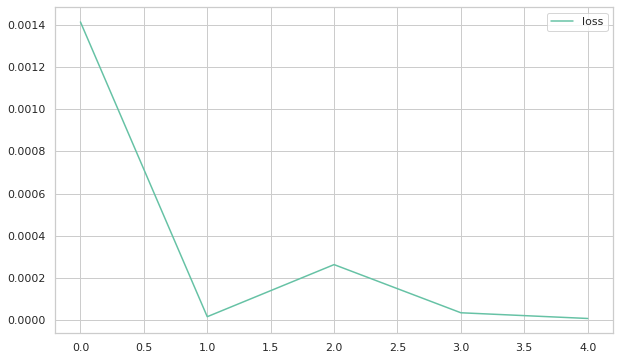

In [95]:
losses.plot();

## Evaluate on Test Data

In [96]:
first_eval_batch = scaled_train[-length:]

In [97]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [98]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [99]:
model.predict(first_eval_batch)

array([[0.9472048]], dtype=float32)

In [100]:
scaled_test[0]

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [101]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [102]:
true_predictions = scaler.inverse_transform(test_predictions)

In [103]:
test

,sine,Predictions
45.1,0.899097,0.926558
45.2,0.938307,0.960718
45.3,0.968142,1.002345
45.4,0.988304,1.029389
45.5,0.998591,1.052660
45.6,0.998900,1.055030
45.7,0.989229,1.061919
45.8,0.969673,1.051510
45.9,0.940429,1.027562
46.0,0.901788,0.993284


In [104]:
test['Predictions'] = true_predictions

<ipython-input-104-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [105]:
test

,sine,Predictions
45.1,0.899097,0.894404
45.2,0.938307,0.929328
45.3,0.968142,0.954894
45.4,0.988304,0.969568
45.5,0.998591,0.974064
45.6,0.998900,0.967943
45.7,0.989229,0.952300
45.8,0.969673,0.927395
45.9,0.940429,0.893606
46.0,0.901788,0.851792


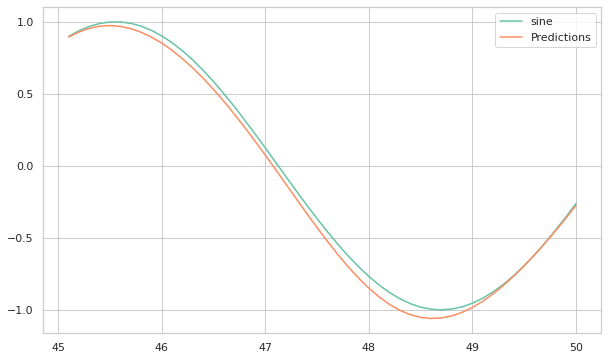

In [106]:
test.plot();

## Adding in Early Stopping and Validation Generator

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

Create a validation generator!

In [108]:
length = 49   # lenght here must be smaller than scaled_test size for the validation generator to work
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length = length, batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length =length, batch_size=1)

# LSTMS

In [109]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [110]:
model.fit(generator, epochs=20,
          validation_data=validation_generator,
          callbacks = [early_stop])

Epoch 1/20
402/402 [==============================] - 3s 8ms/step - loss: 0.0108 - val_loss: 1.6738e-04
Epoch 2/20
402/402 [==============================] - 4s 11ms/step - loss: 4.9901e-04 - val_loss: 2.2175e-04
Epoch 3/20
402/402 [==============================] - 4s 9ms/step - loss: 9.7051e-05 - val_loss: 6.8251e-05
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 8.9415e-05 - val_loss: 1.3210e-06
Epoch 5/20
402/402 [==============================] - 4s 11ms/step - loss: 3.5761e-04 - val_loss: 1.3991e-04
Epoch 6/20
402/402 [==============================] - 4s 10ms/step - loss: 1.3608e-04 - val_loss: 2.4449e-06


In [111]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<ipython-input-112-5640abd0e333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

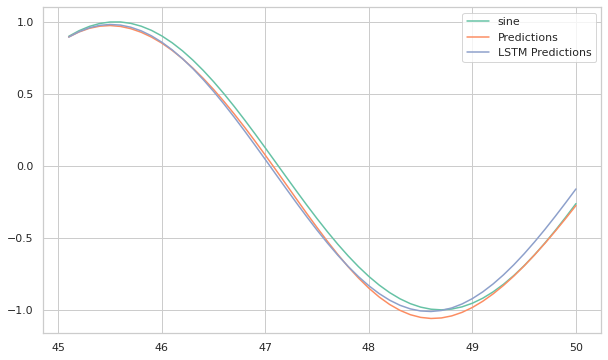

In [112]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot()

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

<AxesSubplot:>

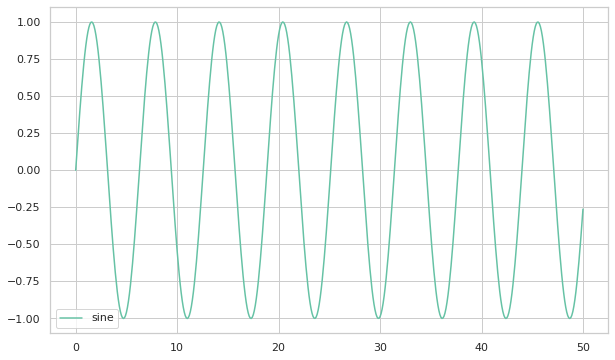

In [113]:
df.plot()

In [114]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [132]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length = length, batch_size=1)

In [133]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [134]:
model.fit(generator, epochs = 6)

Epoch 1/6
451/451 [==============================] - 3s 7ms/step - loss: 0.0095
Epoch 2/6
451/451 [==============================] - 3s 7ms/step - loss: 1.3852e-04
Epoch 3/6
451/451 [==============================] - 3s 7ms/step - loss: 1.1651e-04
Epoch 4/6
451/451 [==============================] - 3s 7ms/step - loss: 2.3441e-04
Epoch 5/6
451/451 [==============================] - 3s 7ms/step - loss: 1.5277e-04
Epoch 6/6
451/451 [==============================] - 3s 7ms/step - loss: 5.4495e-05


In [136]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [137]:
forecast = scaler.inverse_transform(forecast)

Original data stoped at index 50.0, with steps of 0.1. So, next forecasted point should start at 50.1 with steps of 0.1.

In [138]:
forecast_index = np.arange(50.1, 50.1+(len(test)*0.1), step=0.1)

In [139]:
len(forecast_index)

50

In [140]:
len(forecast)

50

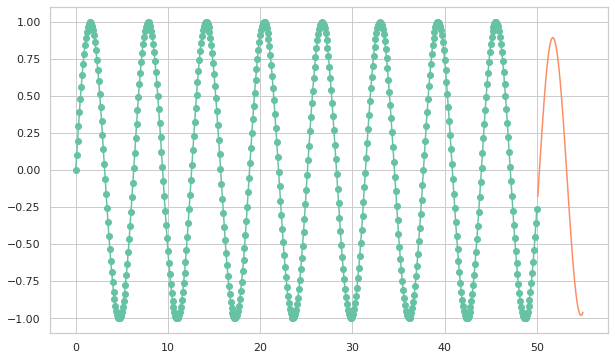

In [142]:
plt.plot(df.index, df['sine'], '-o')
plt.plot(forecast_index, forecast);